In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import numpy as np


In [5]:

# Load the dataset
file_path = '/content/INFY.NS.csv'
data = pd.read_csv(file_path)


In [6]:

# Data Preprocessing
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Fill missing values with forward fill (appropriate for time-series data)
data.fillna(method='ffill', inplace=True)


<ipython-input-6-36fb8bc7b5eb>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:

# Feature Engineering: Adding useful features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


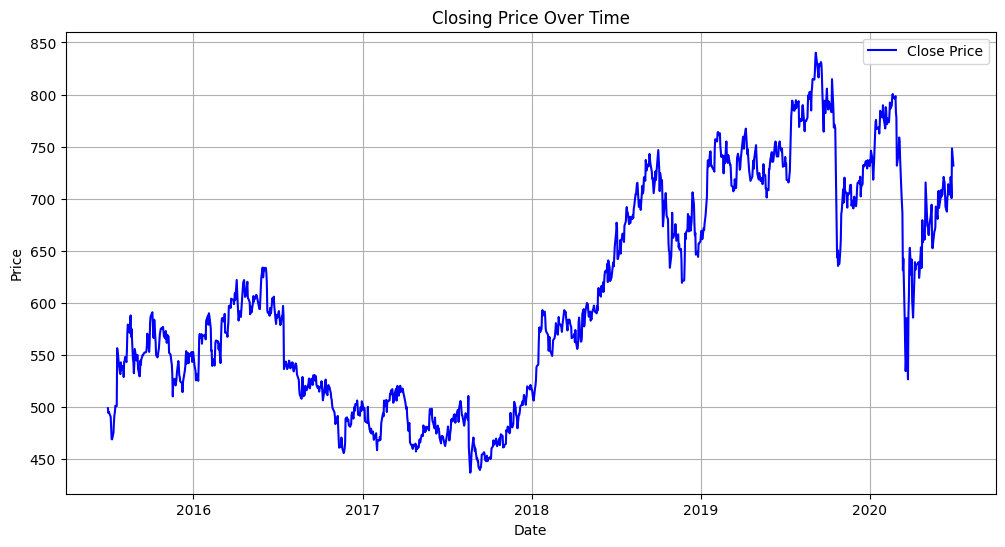

In [8]:

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()



In [9]:
# Defining features and target
features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']
target = 'Close'

X = data[features]
y = data[target]


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)



In [11]:
# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
# Predictions
y_pred = rf_model.predict(X_test)


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 14.166114190406589
Mean Squared Error (MSE): 456.4163032242705
Root Mean Squared Error (RMSE): 21.363901872651226
R-squared (R²): 0.8807624275582647


In [14]:
# Save the model as a pickle file
model_filename = 'random_forest_stock_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"Model saved as {model_filename}")

Model saved as random_forest_stock_model.pkl
